In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

from scipy import signal

from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic
from kid_readout.analysis import detect_peaks
from kid_readout.analysis.resonator import find_resonators, lmfit_resonator

In [2]:
plot_directory = '/home/flanigan/temp/'

In [3]:
npd = npy.NumpyDirectory('/data/readout/2017-11-16_151250_scan.npd/')

In [4]:
npd.node_names()

['Scan0',
 'ADCSnap1',
 'ADCSnap2',
 'ADCSnap3',
 'ADCSnap4',
 'ADCSnap5',
 'ADCSnap6',
 'ADCSnap7',
 'ADCSnap8',
 'ADCSnap9',
 'ADCSnap10',
 'ADCSnap11',
 'ADCSnap12',
 'ADCSnap13']

In [8]:
snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [12]:
[(snap.x.ptp(), snap.y.ptp()) for snap in snaps]

[(9.0, 36.0),
 (9.0, 33.0),
 (9.0, 37.0),
 (10.0, 34.0),
 (10.0, 33.0),
 (9.0, 40.0),
 (10.0, 36.0),
 (9.0, 33.0),
 (10.0, 33.0),
 (9.0, 36.0),
 (10.0, 35.0),
 (9.0, 34.0),
 (10.0, 36.0)]

In [16]:
[(snap.x.std(), snap.y.std()) for snap in snaps]

[(1.3241000727134116, 4.9050804736645253),
 (1.3299109624157142, 4.6506556179482903),
 (1.343067084368921, 4.6735152041378827),
 (1.3735030435279145, 4.7246178275667852),
 (1.3393354202310896, 4.9988439117466141),
 (1.3478097137203024, 5.8942879486936608),
 (1.364441211472601, 6.0178868388841638),
 (1.3495556479771971, 5.1874192702664415),
 (1.3820476032883144, 4.8084521175942525),
 (1.3150316073604214, 4.6992978717995504),
 (1.3690610201300186, 4.7155245437185576),
 (1.3485425605380044, 4.8902341058778083),
 (1.3223088086963763, 5.4121695507920844)]

In [5]:
scan = npd.Scan0

In [6]:
def remove_background(f, s21, amp_degree=4, phi_degree=4, weights=None):
    if weights is None:
        weights = np.abs(s21)**2
    amp_poly = np.polyfit(f, np.abs(s21), deg=amp_degree, w=weights)
    phi_poly = np.polyfit(f, np.unwrap(np.angle(s21)), deg=phi_degree, w=weights)
    return s21 / (np.polyval(amp_poly, f) * np.exp(1j * np.polyval(phi_poly, f)))

# Raw data

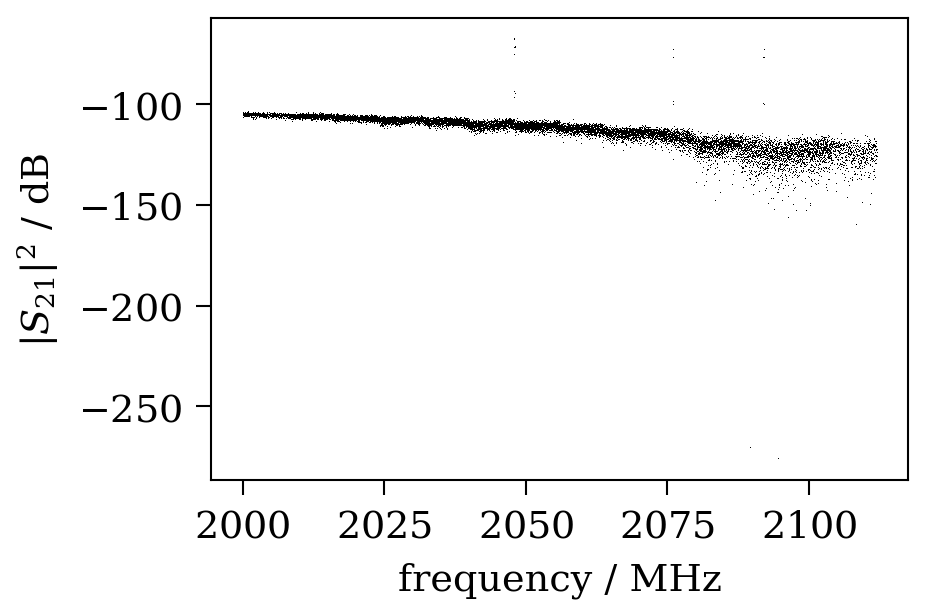

In [20]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / MHz', rotation='horizontal')
ax.set_ylabel('$|S_{21}|^2$ / dB', rotation='vertical')
ax.set_yscale('linear')
ax.set_yscale('linear')
for sa in scan.sweep_arrays:
    ax.plot(sa.frequency_MHz, 20 * np.log10(np.abs(sa.s21_point)), ',k')
ax.legend()
#ax.set_ylim()
#ax.set_xlim()
